In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv("train.csv")
titanic = titanic.dropna(axis = 0, how='any')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [0]:
#homem = 0
#muie = 1
titanic.Sex = titanic.Sex.replace("male", 0)
titanic.Sex = titanic.Sex.replace("female", 1)
titanic.Embarked = titanic.Embarked.replace("S",1)
titanic.Embarked = titanic.Embarked.replace("C",2)
titanic.Embarked = titanic.Embarked.replace("Q",3)
## embarked S = 1
## embarked C = 2
## embarked Q = 3
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,1
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,1


In [0]:
#PASSO 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#PASSO 2
titanic_Model= DecisionTreeClassifier()


#PASSO 3.1 Features
X_titanic = titanic.loc[:,["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
X_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,38.0,1,0,71.2833,2
3,1,1,35.0,1,0,53.1000,1
6,1,0,54.0,0,0,51.8625,1
10,3,1,4.0,1,1,16.7000,1
11,1,1,58.0,0,0,26.5500,1


In [0]:
#PASSO 3.2 Target
y_titanic = titanic.loc[:,"Survived"]
y_titanic.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [0]:
#PASSO 3.3 Split do BD
X_trainTitanic, X_TestTitanic, y_trainTitanic, y_testTitanic = train_test_split(X_titanic,y_titanic, random_state=42)

X_trainTitanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
539,1,1,22.0,0,2,49.5000,2
224,1,0,38.0,1,0,90.0000,1
585,1,1,18.0,0,2,79.6500,1
486,1,1,35.0,1,0,90.0000,1
370,1,0,25.0,1,0,55.4417,2


In [0]:
#PASSO 4 Treinando a IA
titanic_Model.fit(X_trainTitanic,y_trainTitanic)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#PASSO 5 Predict nos valores
Model_decisivo = titanic_Model.predict(X_TestTitanic)

In [0]:
accuracy_score(y_testTitanic, Model_decisivo)

0.782608695652174

Text(83.40000000000006, 0.5, 'Valores Reais')

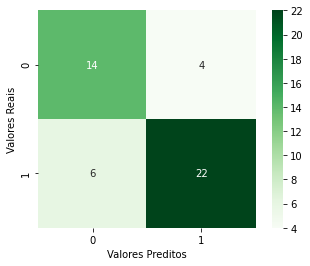

In [0]:
mat_Tree = confusion_matrix(y_testTitanic, Model_decisivo) 
sns.heatmap(mat_Tree, square=True,cmap='Greens', annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

In [0]:
cross_val_score(titanic_Model, X_titanic, y_titanic, cv = 5)

array([0.78378378, 0.89189189, 0.72972973, 0.61111111, 0.86111111])